# Importing data, analyzing, and plotting

It is helpful to have a strategy for importing your data, but then beyond that we normally want to do something to that data set (e.g. fit a polynomial to the data, or find the position of a peak), and then display the results. Here we explore an example of how to do that.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [127]:
# user-modified area:
filename= 'DS0004.csv'


In [128]:
# import data
data = np.genfromtxt(filename,delimiter=',',skip_header=17 )
x_values = data[:,0]
y_values_original = data[:,1]

Just a simple plot of the imported data, no fancy things like axis labels or legends (we'll do that in a moment).

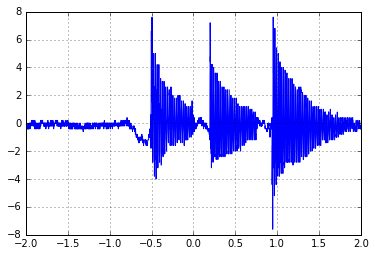

In [171]:
plt.plot(x_values, y_values_original)
plt.grid()
plt.show()

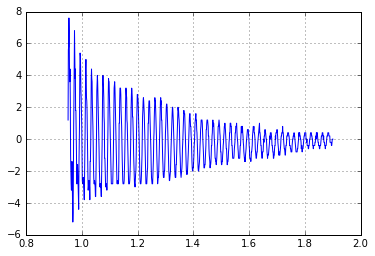

In [168]:
# plt.plot(x_values,y_values_original,'.-g')
start_time, stop_time = 0.95, 1.9
start_time_idx = np.where(x_values > start_time)[0][0]
stop_time_idx = np.where(x_values > stop_time)[0][0]
plt.plot(x_values[start_time_idx:stop_time_idx],
         y_values_original[start_time_idx:stop_time_idx])
plt.grid()
plt.show()

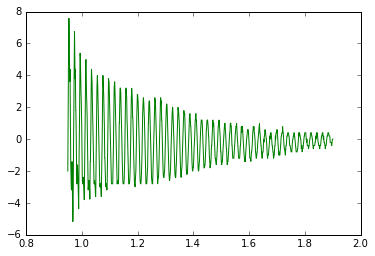

In [139]:
# x_ROI = np.linspace(-.8,-.6,1000)
x_ROI = np.linspace(-1.6,-1.3,10000)
x_ROI = np.linspace(.95,1.9,10000)
# x_ROI = np.linspace(-1.6,-1.0,1000)


f = interpolate.interp1d(x_values,y_values_original)
y_ROI = f(x_ROI) 
plt.plot(x_ROI,y_ROI,'-g')
plt.savefig('mydata.png',dpi=400)

to do:
select a range of interest -- by mouse, or by defining x values (then interp)?
plot nice ROI
FFT on ROI
show FFT for multiple ROI
analyze width, peak, etc..
do it for several waveforms and save result.

In [140]:
Y_FFT = np.fft.fft(y_ROI)
DT = x_ROI[1]-x_ROI[0]
freq = np.fft.fftfreq(x_ROI.shape[-1])/DT
# freq = np.linspace(0,1,x_values.size)/DT

Fitting procedure -- perform a polynomial fit and then prepare the result for plotting

In [103]:
# p = np.polyfit(x_values,y_values,1)   # these are the polynomial coefficients for a linear-order polyomial
# m = p[0]
# b = p[1]
# yfit = m*x_values + b    # constructing the array for the polynomial fit curve

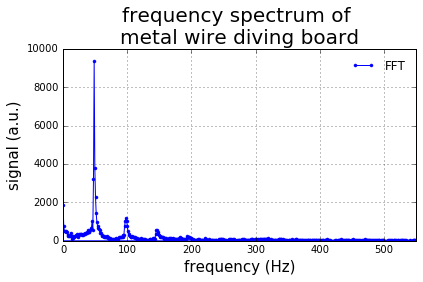

In [141]:
title = 'frequency spectrum of \nmetal wire diving board'
xaxis_label = 'frequency (Hz)'
yaxis_label = 'signal (a.u.)'

plt.plot(freq,np.abs(Y_FFT),'.-',label='FFT')
# plt.plot(x_values,yfit,'.-r',label='linear fit, y = %2.2f*x + %2.2f'%(m,b))

plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(title,fontsize=20)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.xlim([0,550])
plt.legend(frameon=False,loc='best') 
plt.tight_layout() 

# save the figure as a png file. It will be saved 
# to the same directory as your program.
# plt.savefig('mydata.png',dpi=400)
np.savetxt('FFT_'+filename[0:6]+'.txt', (freq,np.abs(Y_FFT)), delimiter=',',fmt='%.4e')

STOP

http://iitg.vlab.co.in/?sub=62&brch=175&sim=1080&cnt=1

In [196]:
filenames = ['DS{:04d}'.format(x) for x in range(5)]

In [197]:
# this is a procedural approach

fft_data = {}

for filename in filenames:
    data = np.genfromtxt('FFT_{}.txt'.format(filename),
                         delimiter=',',unpack=True)
    fft_data[filename] = (data[:,0], data[:,1])
    

In [211]:
# this is a functional approach -- less prone to errors!

def load_data(filename):
    data = np.genfromtxt('FFT_{}.txt'.format(filename),
                         delimiter=',',unpack=True)
    return data[:,0], data[:, 1]

fft_data = {filename:load_data(filename) for filename in filenames}

In [212]:
fft_data.keys()

dict_keys(['DS0000', 'DS0004', 'DS0001', 'DS0002', 'DS0003'])

In [215]:
fft_data['DS0000'][1]

array([ 5421.9,  1837.9,  1857.8, ...,  2065.4,  1857.8,  1837.9])

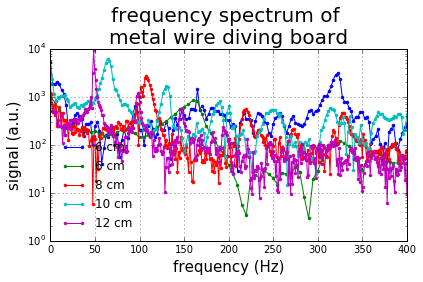

In [222]:
label_dict = {0:6,1:6,2:8,3:10,4:12}

for filename in filenames:
    fft_x = fft_data[filename][0]
    fft_y = fft_data[filename][1]
    plt.semilogy(fft_x,fft_y,'.-',
                 label='{} cm'.format(label_dict[int(filename.strip('DS'))]))

plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(title,fontsize=20)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.legend(frameon=False,loc='best') 
plt.xlim([0,400])
plt.ylim([1,10000])
plt.tight_layout() 

In [143]:
data0 = np.genfromtxt('FFT_DS0000.txt',delimiter=',',unpack=True)
FFT_X0 = data0[:,0]
FFT_Y0 = data0[:,1]
data1 = np.genfromtxt('FFT_DS0001.txt',delimiter=',',unpack=True)
FFT_X1 = data1[:,0]
FFT_Y1 = data1[:,1]
data2 = np.genfromtxt('FFT_DS0002.txt',delimiter=',',unpack=True)
FFT_X2 = data2[:,0]
FFT_Y2 = data2[:,1]
data3 = np.genfromtxt('FFT_DS0003.txt',delimiter=',',unpack=True)
FFT_X3 = data3[:,0]
FFT_Y3 = data3[:,1]
data4 = np.genfromtxt('FFT_DS0004.txt',delimiter=',',unpack=True)
FFT_X4 = data4[:,0]
FFT_Y4 = data4[:,1]

In [120]:
plt.semilogy(fft_data['DS0004.txt'][0], fft_data['DS0004.txt'][1])
plt.semilogy(fft_data['DS0005.txt'][0], fft_data['DS0005.txt'][1])

array([    0. ,  5421.9])

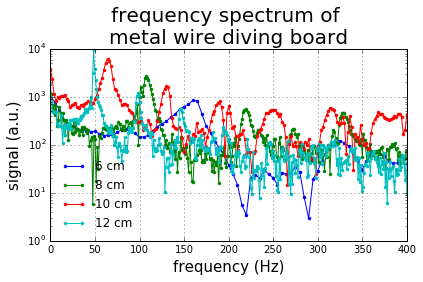

In [145]:


# plt.plot(FFT_X0,FFT_Y0,'.-',label='12.5 cm')
plt.semilogy(FFT_X1,FFT_Y1,'.-',label='6 cm')
plt.semilogy(FFT_X2,FFT_Y2,'.-',label='8 cm')
plt.semilogy(FFT_X3,FFT_Y3,'.-',label='10 cm')
plt.semilogy(FFT_X4,FFT_Y4,'.-',label='12 cm')

plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(title,fontsize=20)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.legend(frameon=False,loc='best') 
plt.xlim([0,400])
plt.ylim([1,10000])
plt.tight_layout() 

# save the figure as a png file. It will be saved 
# to the same directory as your program.
plt.savefig('diving board data_freq.png',dpi=400)



In [172]:
d=1.5*10**-3
L = 12*10**-2

E=0.69*10**11  # N/m^2
rho = 2700  # kg/m^3

I=np.pi/64*d**4
A = np.pi*(d/2)**2

freq_mult = (1/(2*np.pi))* np.sqrt(E*I/(rho*A*L**4))
freq1 = 1.875**2 * freq_mult
freq2 = 4.694**2 * freq_mult
freq3 = 7.855**2 * freq_mult
[freq1,freq2,freq3]

[73.660407090512408, 461.65520993967482, 1292.7779895187582]